# Packages

In [63]:
using Pkg; Pkg.activate("."); 
using StatsBase
using MUST
using PyPlot
using PyCall
using KernelDensity
using DelimitedFiles
using Printf
using TSO

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2"

MUST.@get_help visual
pl = pyimport("matplotlib.pylab");

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


# Tables

In [64]:
eos = reload(SqEoS, "/u/peitner/Turbospectrum/opacity_tables/tests/DIS_MARCS_v0.4.4/eos.hdf5")
opa = reload(SqOpacity, "/u/peitner/Turbospectrum/opacity_tables/tests/DIS_MARCS_v0.4.4/binned_opacities.hdf5");

The stagger model to compare with

In [65]:
folder_stagger = "/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost"
stagger        = MUST.Box("box_solar_stagger_DISSTAG", folder=folder_stagger)
stagger_t      = MUST.Box("box_solar_stagger_DISSTAG_t", folder=folder_stagger)
stagger_t2     = MUST.Box("box_solar_stagger_original_t", folder=folder_stagger);

A mean model from Stein & Nordlund 1997

In [66]:
ztSN = readdlm("stein_nordlund_1997_mean_T.csv", ',')
zSN, tSN = ztSN[:, 1] .* 1e8, ztSN[:, 2] .* 1e3
modelSN  = Model1D(z=zSN, lnT=log.(tSN));

Bifrost model from Richard

In [67]:
ztB = readdlm("bifrost_richard.txt")
tauB, tB = ztB[:, 1], ztB[:, 2] 
modelB  = Model1D(τ=exp10.(tauB), lnT=log.(tB));

DISPTACH model with Akes opacities

In [68]:
folders = MUST.@in_dispatch("data/DISSTAG_v0.1_profile")
snaps   = 65
labels  = "Legacy Stagger @dispatch"


model, model_t = first(MUST.Boxes(folders, snaps=snaps)), 
                 last(MUST.Boxes(folders, snaps=snaps));

MURaM model

In [69]:
folder_muram = "/ptmp/peitner/model_grid/MUST.jl/examples/Muram"
muram        = MUST.Box("box_MURaM_cube_small.221000", folder=folder_muram)
muram_t      = MUST.Box("box_tau_MURaM_cube_small.221000", folder=folder_muram);

# Average T-z profiles

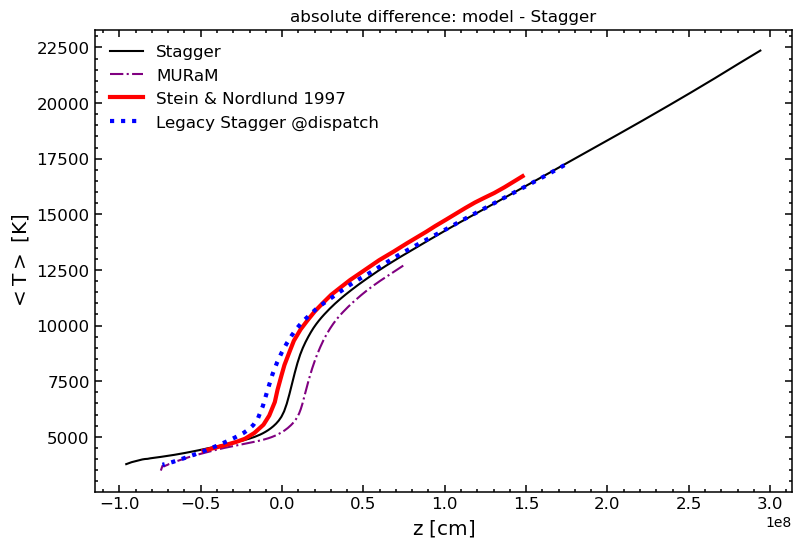

In [70]:
# Plotting
close()
f, ax = plt.subplots(1, 1, figsize=(9,6))
basic_plot!.(ax)


## Stagger
d_stagger  = MUST.plane_statistic(mean, stagger, :T)
z_stagger  = MUST.axis(stagger, :z)

## Muram
d_muram  = MUST.plane_statistic(mean, muram, :T)
z_muram  = MUST.axis(muram, :z)

## Stein, Nordlund
d_SN = exp.(modelSN.lnT)
z_SN = modelSN.z

## Legacy Stagger
d = MUST.plane_statistic(mean, model, :T)
z = MUST.axis(model, :z) #.-0.15e8



## Plotting

    ## Stagger 
ax.plot(-z_stagger,  d_stagger,  color="k", label="Stagger")

    ## Muram 
ax.plot(z_muram,  d_muram,  color="purple", label="MURaM", ls="-.")

    ## Stein & Nordlund 1997
ax.plot(z_SN,  d_SN,  color="r", label="Stein & Nordlund 1997", lw=3)

    ## Legacy Stagger
ax.plot(-z, d, label=labels, color="b", lw=3, ls=":")


## Plot style
ax.set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")
ax.set_xlabel(L"\rm z \ [cm]", fontsize="x-large")
ax.set_xlabel(L"\rm z \ [cm]", fontsize="x-large")

ax.set_title("average profiles", fontsize="large")
ax.set_title("absolute difference: model - Stagger", fontsize="large")
ax.legend(framealpha=0, loc="upper left", fontsize="large");

#ax[1].set_xlim(-0.8e8,1.5e8)
#ax[1].set_ylim(3000, 17000)

gcf()

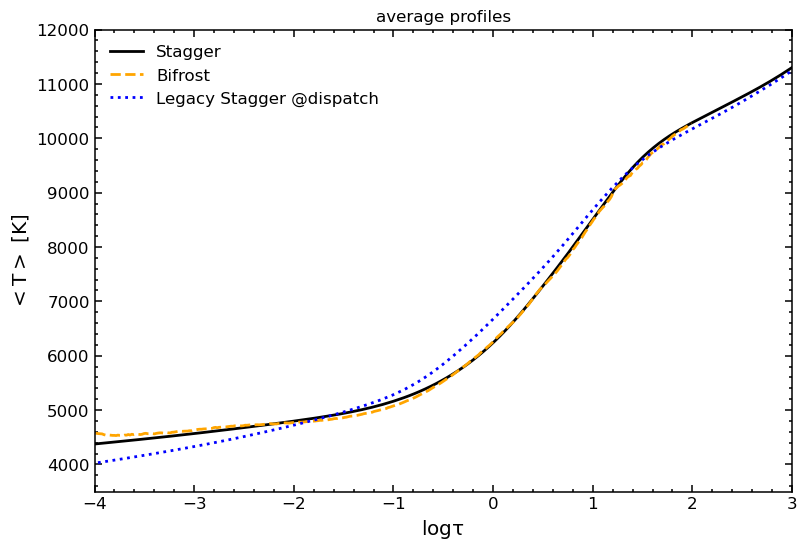

In [74]:
# Plotting
close()
f, ax = plt.subplots(1, 1, figsize=(9,6))
basic_plot!.(ax)


## Stagger
d_stagger  = MUST.plane_statistic(mean, stagger_t, :T)
z_stagger  = log10.(MUST.axis(stagger_t, :τ_ross, 3))

## MURaM
d_muram  = MUST.plane_statistic(mean, muram_t, :T)
z_muram  = log10.(MUST.axis(muram_t, :τ_ross, 3))

## Stein, Nordlund
#d_SN = exp.(modelSN_t.lnT)
#z_SN = log10.(modelSN_t.τ)

## Bifrost
d_B = exp.(modelB.lnT)
z_B = log10.(modelB.τ)

## Legacy Stagger
d = MUST.plane_statistic(mean, model_t, :T)
z = log10.(MUST.axis(model_t, :τ_ross, 3))



## Plotting

    ## Stagger 
ax.plot(z_stagger,  d_stagger,  color="k", label="Stagger", lw=2)

    ## Muram 
#ax.plot(z_muram,  d_muram,  color="purple", label="MURaM", lw=2, ls="-.")

    ## Stein & Nordlund 1997
#ax.plot(z_SN,  d_SN,  color="r", label="Stein & Nordlund 1997", lw=3)

    ## Bifrost
ax.plot(z_B,  d_B,  color="orange", label="Bifrost", lw=2, ls="--")

    ## Legacy Stagger
ax.plot(z, d, label=labels, color="b", lw=2, ls=":")



## Plot style
ax.set_ylabel(L"\rm <T> \ [K]", fontsize="x-large")
ax.set_xlabel(L"\rm \log \tau", fontsize="x-large")
ax.set_title("average profiles", fontsize="large")
ax.legend(framealpha=0, loc="upper left", fontsize="large");


ax.set_xlim(-4,3)
ax.set_ylim(3500,12000)

#ax[2].set_xlim(-4,4)
#ax[1].set_ylim(4000,13000)


gcf()